In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


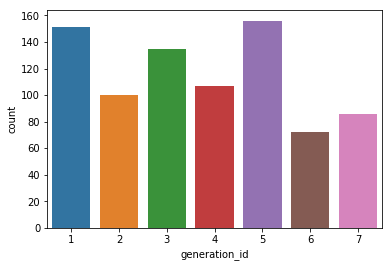

In [3]:
# to start off with, let's create a bar chart on one of the categorical variable in the dataset, `generation_id`
# eventhough the values in this column look numeric, they are just categorical labels indicating when each species was
# introduced to the series from 1st generation to 7th generation

sb.countplot(data = pokemon, x = 'generation_id');

In [4]:
# Since no need for these color above

sb.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [5]:
# I will pick the first tuple

sb.color_palette()[0]

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

In [6]:
# and store it in a variable

base_color = sb.color_palette()[0]

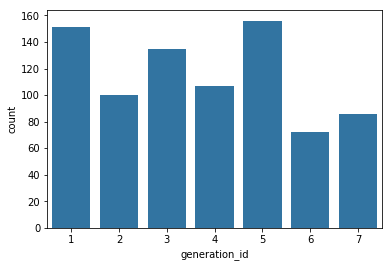

In [7]:
# Then set the plot with this tuple

sb.countplot(data = pokemon, x = 'generation_id', color = base_color);

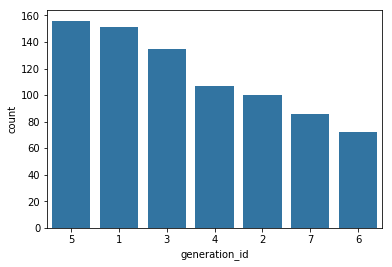

In [8]:
# Sort the bars

sb.countplot(data = pokemon, x = 'generation_id', color = base_color,
             order = [5,1,3,4,2,7,6]);

In [9]:
# Or Sort the bars programatically

pokemon['generation_id'].value_counts()

# sb.countplot(data = pokemon, x = 'generation_id', color = base_color,
#             order = [5,1,3,4,2,7,6]);

5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: generation_id, dtype: int64

In [10]:
# take the indeces 

gen_order = pokemon['generation_id'].value_counts().index

# sb.countplot(data = pokemon, x = 'generation_id', color = base_color,
#             order = [5,1,3,4,2,7,6]);

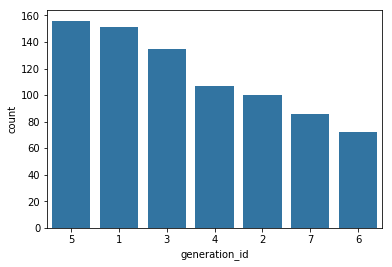

In [11]:
 sb.countplot(data = pokemon, x = 'generation_id', color = base_color,
             order = gen_order);

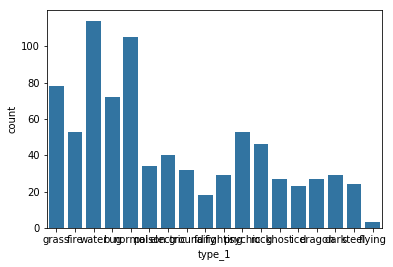

In [12]:
# let's chart another column `type_1`

sb.countplot(data = pokemon, x = 'type_1', color = base_color);

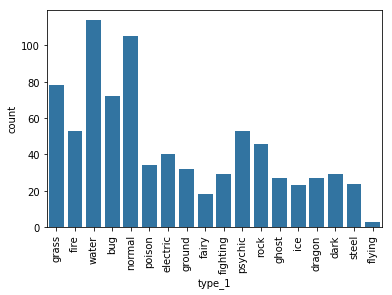

In [13]:
# the labels not readable !
# Use plt.xticks() function

sb.countplot(data = pokemon, x = 'type_1', color = base_color);
plt.xticks(rotation = 90);

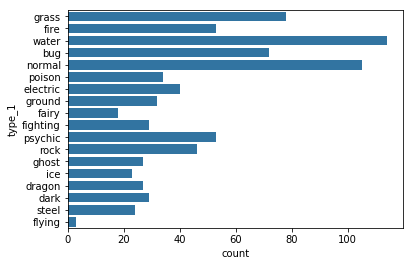

In [14]:
# Alternativally, rotate the whole chart

sb.countplot(data = pokemon, y = 'type_1', color = base_color);

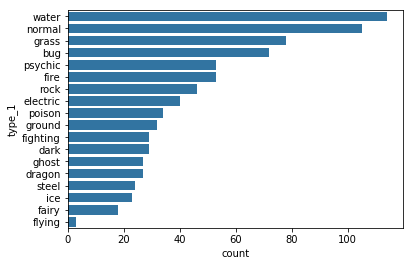

In [15]:
# For Ordering

type_order = pokemon['type_1'].value_counts().index
sb.countplot(data = pokemon, y = 'type_1', color = base_color, order = type_order);

In [16]:
pkmn_types = pokemon.melt(id_vars = ['id', 'species'],
                          value_vars = ['type_1', 'type_2'],
                          var_name = 'type_level', value_name = 'type').dropna()

pkmn_types[802:812]

,id,species,type_level,type
802,803,poipole,type_1,poison
803,804,naganadel,type_1,poison
804,805,stakataka,type_1,rock
805,806,blacephalon,type_1,fire
806,807,zeraora,type_1,electric
807,1,bulbasaur,type_2,poison
808,2,ivysaur,type_2,poison
809,3,venusaur,type_2,poison
812,6,charizard,type_2,flying
818,12,butterfree,type_2,flying


### What proportion of Pokemon have each type?

In [17]:
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index

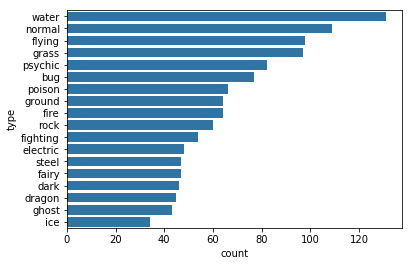

In [18]:
base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);

#### Change the tick marks from labeling the absolute counts to relative counts.

In [19]:
# Creating a list of tick positions
# We start by computing the length of the longest bar in terms of proportion
# The original pokemon dataframe gives us the denominator, and we will use value_counts() to get the numerator

n_pokemon = pokemon.shape[0]
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon
print(max_prop)

0.1623296158612144


In [20]:
# Now we use NumPy's arange function to produce a set of evenly spaced proportioned values between 0 and the max in steps of 2% 

np.arange(0, max_prop, 0.02)

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16])

In [21]:
# Store the values in tick_props

tick_props = np.arange(0, max_prop, 0.02)

# Also, use a list comprehension to create an additional variable tick_names to apply to the tick labels
# Tese strings will show the proportions with a consistent two decimal places

['{:0.2f}'.format(v) for v in tick_props]

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14', '0.16']

In [22]:
# Store it

tick_names = ['{:0.2f}'.format(v) for v in tick_props]

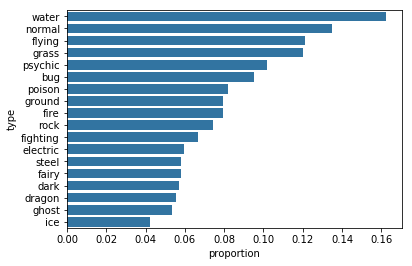

In [23]:
base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);

# To change the tick locations and labels we use xticks() function, the first argument sets the tick positions
# Since the counts are still an absolute value we need the multiplcation to get their position correct
# The second argument sets the tick labels, 
# We need to use both arguments here since the positions and their values are different

plt.xticks(tick_props * n_pokemon, tick_names)

# Finally, we use the xlabel() function to change the x-axis label from the default count to more appropriate proportion

plt.xlabel('proportion');

> The resulting plot shows us that about 16% of all Pokemon include the water type all the way down to only 4% that include the ice type

In [24]:
# Alternativelly, maybe we want to have the axes in terms of counts, and use text on the bars to show proportion
# This is the flixibility of Matplotlib can shine


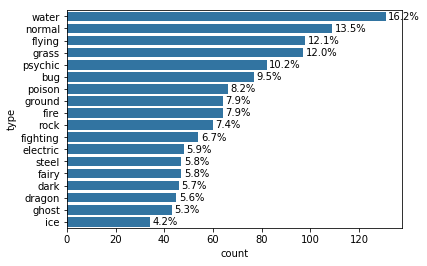

In [25]:
base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);

# We use a loop to place text elements one by one 
# The first argument to the txet function is the X position just after the end of the bar
# The second argument is the Y position which starts at 0 and increments with the loop 
# The third argument is the string to be printed, the percentage
# Finally, I am going to an optional parameter va, to center the vertical alignment of text on each bar

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(count+1, i, pct_string, va = 'center');

## Histograms

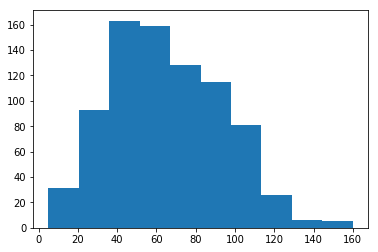

In [27]:
plt.hist(data = pokemon, x = 'speed');

> The distribution of speed values appears uni-modal and slightly right skewed,
<br></br>
> But there is not a lot of detail here 
<br></br>
> By default, Matplotlib will split the data into 10 bins, which is usually too few
<br></br>
> in addition, the bin boundaries are not particularly aligned with the tick marks making interpretation trickier

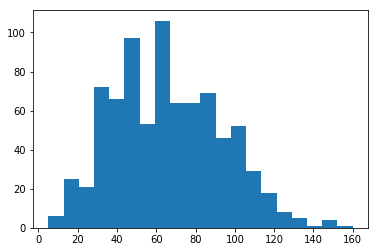

In [28]:
# To solve this, we want to use the bins parameter 

plt.hist(data = pokemon, x = 'speed', bins = 20);

(array([  6.,  25.,  21.,  72.,  66.,  97.,  53., 106.,  64.,  64.,  69.,
         46.,  52.,  29.,  18.,   8.,   5.,   1.,   4.,   1.]),
 array([  5.  ,  12.75,  20.5 ,  28.25,  36.  ,  43.75,  51.5 ,  59.25,
         67.  ,  74.75,  82.5 ,  90.25,  98.  , 105.75, 113.5 , 121.25,
        129.  , 136.75, 144.5 , 152.25, 160.  ]),
 <a list of 20 Patch objects>)

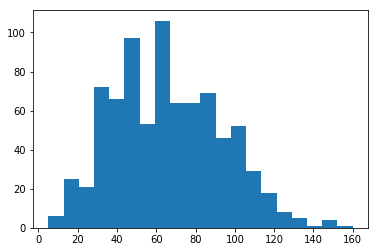

In [29]:
# remove the simicolon to see the bin edges and counts

plt.hist(data = pokemon, x = 'speed', bins = 20)

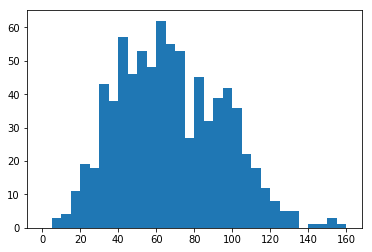

In [30]:
bins = np.arange(0, pokemon['speed'].max()+5, 5)
plt.hist(data = pokemon, x = 'speed', bins = bins);

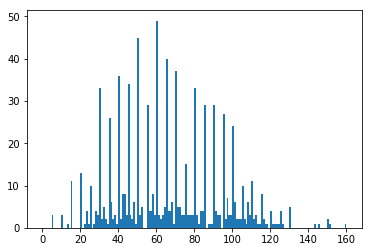

In [31]:
bins = np.arange(0, pokemon['speed'].max()+1, 1)
plt.hist(data = pokemon, x = 'speed', bins = bins);

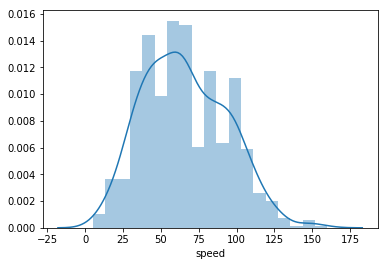

In [32]:
sb.distplot(pokemon['speed'])

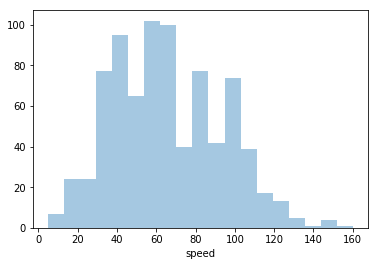

In [34]:
sb.distplot(pokemon['speed'], kde=False)

## Figures, Axes, and Subplots

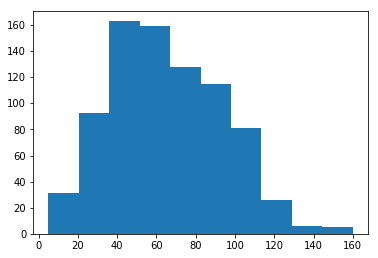

In [35]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .775])
ax.hist(data = pokemon, x = 'speed');

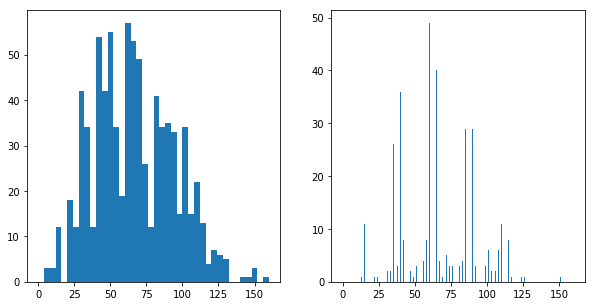

In [45]:
plt.figure(figsize = [10, 5]) # larger figure size for subplots

# example of somewhat too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges);

# example of somewhat too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges);

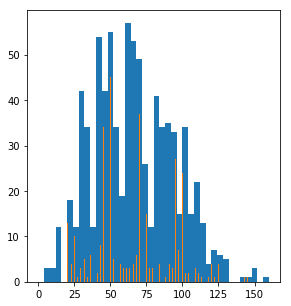

In [44]:
plt.figure(figsize = [10, 5]) # larger figure size for subplots

# example of somewhat too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges);

# example of somewhat too-small bin size
#plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges);

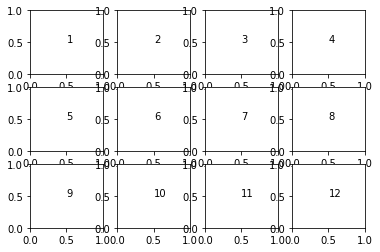

In [46]:
fig, axes = plt.subplots(3, 4) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of Axes


## Choosing a Plot for Descrete Data

In [66]:
import random

die_rolls = []
for _ in range(100):
    x = random.randint(1,6)
    die_rolls.append(x)

In [67]:
die_rolls

[1,
 6,
 4,
 6,
 2,
 4,
 3,
 2,
 4,
 4,
 3,
 3,
 2,
 2,
 1,
 2,
 3,
 5,
 6,
 6,
 3,
 1,
 3,
 1,
 1,
 3,
 6,
 5,
 2,
 3,
 1,
 6,
 3,
 4,
 2,
 5,
 3,
 4,
 4,
 6,
 3,
 2,
 2,
 6,
 1,
 1,
 3,
 6,
 5,
 4,
 1,
 5,
 1,
 4,
 4,
 2,
 2,
 2,
 3,
 3,
 4,
 5,
 1,
 6,
 4,
 6,
 1,
 3,
 2,
 1,
 6,
 4,
 4,
 1,
 2,
 4,
 1,
 6,
 3,
 1,
 3,
 1,
 3,
 2,
 3,
 2,
 4,
 5,
 5,
 3,
 1,
 6,
 6,
 2,
 5,
 3,
 3,
 4,
 5,
 6]

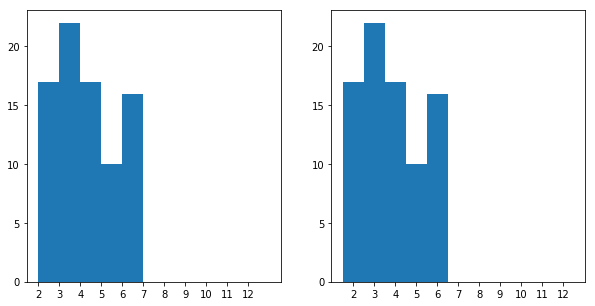

In [69]:
plt.figure(figsize = [10, 5])

# histogram on the left, bin edges on integers
plt.subplot(1, 2, 1)
bin_edges = np.arange(2, 12+1.1, 1) # note `+1.1`, see below
plt.hist(die_rolls, bins = bin_edges);
plt.xticks(np.arange(2, 12+1, 1));

# histogram on the right, bin edges between integers
plt.subplot(1, 2, 2)
bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(die_rolls, bins = bin_edges);
plt.xticks(np.arange(2, 12+1, 1));

## Descriptive Statistics, Outliers, and Axis limits

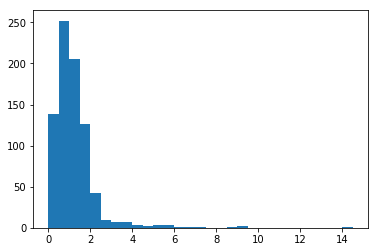

In [48]:
bins = np.arange(0, pokemon['height'].max()+0.5, 0.5)
plt.hist(data = pokemon, x = 'height', bins = bins);

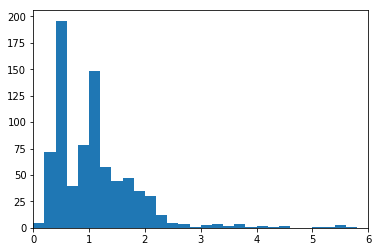

In [49]:
bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)
plt.hist(data = pokemon, x = 'height', bins = bins);
plt.xlim((0,6));

(0, 6)

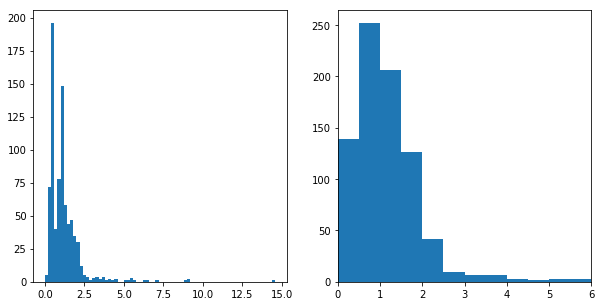

In [53]:
plt.figure(figsize = [10, 5])

# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, pokemon['height'].max()+0.2, 0.2)
plt.hist(data = pokemon, x = 'height', bins = bin_edges)

# histogram on right: focus in on bulk of data < 35
plt.subplot(1, 2, 2)
bin_edges = np.arange(0, 6+0.5, 0.5)
plt.hist(data = pokemon, x = 'height', bins = bin_edges)
plt.xlim(0, 6) # could also be called as plt.xlim((0, 35))


In [54]:
pokemon.height.value_counts()

0.6     73
0.4     62
1.0     61
0.5     61
0.3     54
1.2     50
0.8     44
1.5     44
0.7     40
1.1     37
0.9     34
1.3     29
1.4     29
1.6     25
1.7     22
1.8     22
2.0     22
0.2     18
1.9     13
2.1      8
2.2      6
2.5      5
0.1      5
2.4      3
3.0      3
2.3      3
9.2      2
4.0      2
4.5      2
5.5      2
3.2      2
3.5      2
3.8      2
2.7      2
14.5     1
7.0      1
6.5      1
5.0      1
6.2      1
3.7      1
5.8      1
4.2      1
8.8      1
2.9      1
2.6      1
5.4      1
3.4      1
5.2      1
3.6      1
2.8      1
3.9      1
3.3      1
Name: height, dtype: int64

## Scales and Transformations

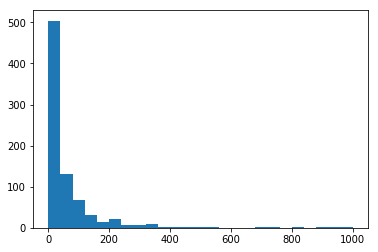

In [70]:
bins = np.arange(0, pokemon['weight'].max()+40, 40)
plt.hist(data = pokemon, x = 'weight', bins = bins);

> Rather than trim the axis limits like before, we will try an axis transform instead

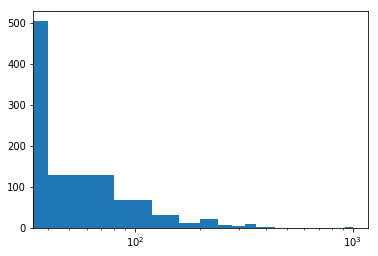

In [71]:
bins = np.arange(0, pokemon['weight'].max()+40, 40)
plt.hist(data = pokemon, x = 'weight', bins = bins);
plt.xscale('log');

> very odd looking plot 

In [72]:
# First let's discuss the bins
pokemon['weight'].describe()


count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

> The minimum weight is 0.1 and the maximum is 999.9

In [73]:
# The log of these values base 10 are negative one here under the third row
# these give us the limits for our bins

np.log10(pokemon['weight'].describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

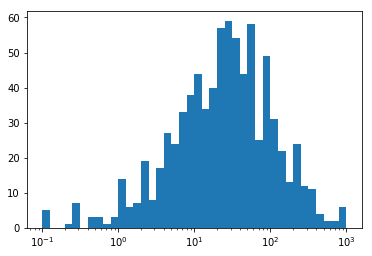

In [74]:

bins = 10 ** np.arange(-1, 3 + 0.1, 0.1)
plt.hist(data = pokemon, x = 'weight', bins = bins);
plt.xscale('log');

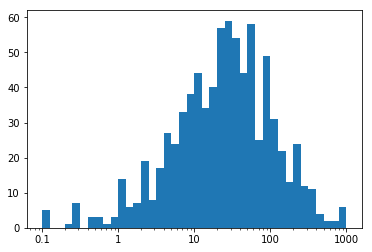

In [76]:
bins = 10 ** np.arange(-1, 3 + 0.1, 0.1)
ticks = [0.1, 1, 10, 100, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = pokemon, x = 'weight', bins = bins);
plt.xscale('log');
plt.xticks(ticks, labels);

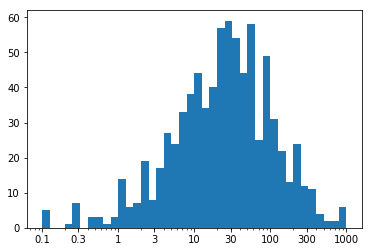

In [77]:
bins = 10 ** np.arange(-1, 3 + 0.1, 0.1)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = pokemon, x = 'weight', bins = bins);
plt.xscale('log');
plt.xticks(ticks, labels);